## **TF/IDF 演算法**



*   每篇都有不稀奇，這篇出現很多就重要。
*   TF : 某字詞出現頻率（或比例）
*   IDF : 某字詞在所有文件出現機率之倒數



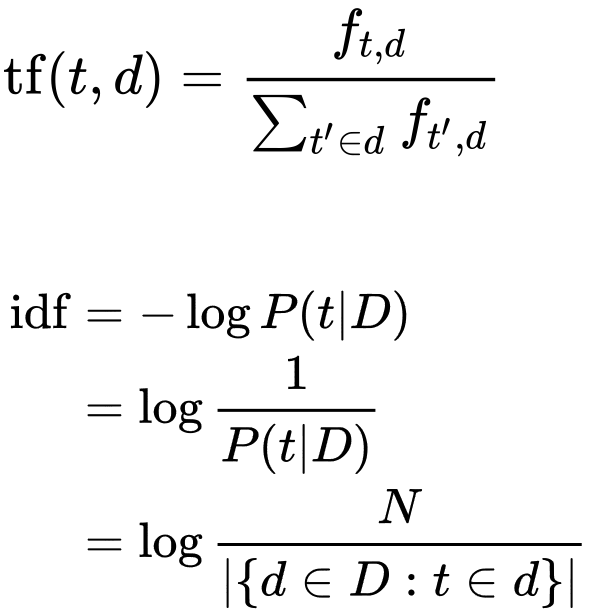

In [1]:
# get Stanford NLP package and stuffs
!pip install stanfordcorenlp

#!wget http://140.119.164.107/matytest/stanford-corenlp-full-2018-02-27.tgz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# If you have .tar, then:
#!tar xvf stanford-corenlp-full-2018-02-27.tar

In [17]:
# cp 代表使用C語言寫的Python解譯器. 
!cp -R "/content/drive/MyDrive/Colab Notebooks/人工智慧技術與網路意向分析/Week 6/stanford-corenlp-full-2018-02-27 2" .

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
# 使用Python實現Linux系統中ls的指令(用於顯示指定工作目錄下的内容)
!ls -al

total 20
drwxr-xr-x 1 root root 4096 Apr 23 06:29 .
drwxr-xr-x 1 root root 4096 Apr 23 06:20 ..
drwxr-xr-x 4 root root 4096 Apr 19 13:36 .config
drwx------ 6 root root 4096 Apr 23 06:29 drive
drwxr-xr-x 1 root root 4096 Apr 19 13:37 sample_data


In [8]:
# tarfile 是Python 中的一個標準模組，可用於操作gzip、bz2、lzma 等格式的壓縮、解壓縮 
# 若是以副檔名來分辨，那就是tar.gz、tar.bz2、tar.xz 等三種副檔名格式的檔案
!tar xzvf stanford-corenlp-full-2018-02-27.tgz

tar (child): stanford-corenlp-full-2018-02-27.tgz: Cannot open: No such file or directory
tar (child): Error is not recoverable: exiting now
tar: Child returned status 2
tar: Error is not recoverable: exiting now


## 以下這五篇是參考用的文字，來自五次的蔡英文文告。

In [9]:
##########################################################################################
### 蔡英文 2022 元旦談話全文
content_2022_Jan = '''今天是元旦，首先我要祝大家新年快樂。

過去一年對台灣來說，是特別的一年。我們一起度過因為疫情而震盪起伏的幾個月；一起走過為了四項公投，從連署到投票的公共討論歷程。

公投歷程說明了，台灣正逐漸成為一個成熟的公民社會，當挑戰來的時候，大家對於該怎麼做、怎麼回應，也許會有不同的意見跟想法；但是當我們透過民主機制，解決了問題，社會就會很快的恢復平靜，運作如常。

而疫情更是考驗台灣人民的團結，以及公民的素質。謝謝這一年來，所有台灣人民的努力。當我們團結一致，當我們相信民主機制，台灣就能克服種種挑戰。

去年的台灣，也有不少好消息。我們的經濟成長率，預估來到十一年來的新高，股市的大盤指數，也在一年內上漲超過百分之23，最近更創下了歷史新高。

去年台灣每人GDP，首次超過三萬美元，如果以購買力平價計算，每人GDP更已經超過許多OECD國家的水準。另外，IMF也預測，台灣將在明年重返全球前20大經濟體。

但在我們眼前，還有很多挑戰。全球疫情依然嚴峻，讓復甦充滿了不確定性。通膨、房價，以及可能再起的疫情，都是我們在經濟成長的同時，必須要嚴肅面對的課題。

此外，如何在下半年激烈的選舉競爭中，保持穩健的政經腳步。如何在中國不斷增加的軍事和外交壓力之下，堅持守住自由民主，堅持走向世界的共識，也都是我們2022年的台灣，必須積極面對的挑戰。

持續走向世界、維持經濟發展動能、鞏固社會安全體系、堅守國家主權，這就是我們2022年穩健執政的四大主軸。

持續走向世界

去年四大公投的結果，顯示了台灣人走向世界的決心。新的一年，我們仍然會就國際經貿多元布局，走出對單一市場的依賴，做出更多努力。

除了持續推動新南向政策，深化跟新南向國家的合作交流，我們也希望台美TIFA對話更加深入，為將來的FTA打好基礎。

我們也會全力爭取CPTPP的會員國，對台灣加入的支持。同時，我們將提出「強化歐洲鏈結計畫」，促進台歐之間的密切交流。

維持經濟發展動能

在維持經濟動能方面，這幾年來，面對全球變局，民間企業展現了強大的韌性，配合政府大力推動五加二、六大核心戰略產業，讓台灣產業的競爭力全面提升，成為全球經濟發展的關鍵力量。

現在，台灣已經是全球半導體製造產業的領導者。未來，無論是智慧城市的解決方案、綠色能源的布建，或是電動車等等的晶片需求，台灣都扮演了極為關鍵的角色。

在全球數位轉型和因應氣候變遷的成敗上，台灣也是不可或缺的重要環節；台商的動向，更將牽動全球產業鏈的布局。

未來，我們必須不斷增強台灣產業的影響力和競爭力。因此新的一年，我們會持續推動能源轉型，也會以前瞻、且務實可行的方式，提出淨零排放的路徑圖，讓整體經濟結構的轉型有所依循。

另外，行政院也已經宣布，「投資台灣三大方案」將再延長三年，我們預計，可以再為台灣帶來9千億元的投資，和4萬個工作機會。

在維持經濟動能的同時，我們必須有效的因應通膨、房價上漲的趨勢，使得經濟成長的果實，可以化為實質所得的增加，以及生活水準的提高。

物價和房價上漲，是今年全世界都要面臨的挑戰。去年下半年以來，我們運用公用事業緩漲機制，以及「健全房地產市場方案」的選擇性金融管制、稅改和行政查察措施，讓物價和房價的漲幅比其他國家稍微溫和。

未來，我們會繼續運用各種政策工具，來確保物價平穩。另外，我們也會透過穩定物價小組、健全房市小組，強力遏制不法炒作及囤積。

今天開始，基本薪資調高到2萬5,250元，比起去年調幅達到百分之5.21。等到總預算通過，軍公教也將調薪百分之4，希望能夠刺激並帶動民間加薪，這將有助於減緩通膨的衝擊。

社會住宅的供給，也將提供年輕人及弱勢者合理價格的居住空間。去年我們宣布啟動50案、1.5萬戶的史上最大規模社會住宅興建案，這些都在陸續發包中。發包、興建中、或已興建完成的社會住宅，現在已經累計達5萬戶。

展望2022年，我們除了加速社會住宅的興建計畫，也將推動「長者換居」、旅館轉型，把去年已經擴大到1.6萬戶規模的「包租代管」方案，繼續加速推廣出去。

另外，從前年起，我們也擴大租金補貼，依照不同縣市地區，提供年輕朋友或家庭，每個月數千元不等的補貼，今年也會持續下去。

鞏固社會安全體系

增加社會福利，降低生養、照顧的負擔，不僅是分配問題，更是社會安全問題；我們將持續鞏固社會安全體系。

去年，長照2.0的服務據點，已經超過一萬個，遍布全國各地；今年的長照預算將達607億元，並且將持續布建據點和增加服務。

為了強化社會安全網，我們會持續增加公部門社工以及相關專業人員；今年將新增超過5千人，也會補助私部門社工1,454人，來減輕社工的工作負荷，也提升保障弱勢家庭的量能。

在去年育兒津貼加碼之後，今年8月還會再加碼到5,000元。公共化幼兒園三千班的目標，明年會提前達標。

去年所有提供公共化、非營利和準公共化幼兒園的園所數，已經大幅成長。過去家長反映抽到公立幼兒園的機會只有三成，現在已經提高到六成，可以進入平價優質的幼兒園。

去年母親節時，我說政府要當孩子家長的神隊友，在今年，產檢假會增加到七天，而且配偶也可以請陪產檢假。

我們將持續檢討、增加補助，強化各方面的措施，降低養兒育女的負擔。「0到6歲國家跟你一起養」，我們說到就一定做到。

堅守國家主權

新的一年，「穩健執政」，是我們最重要的目標。我們會堅守主權、堅持自由民主的價值，捍衛領土主權與國家安全，維持印太地區的和平穩定。


我們將會持續關注香港的情勢。前陣子，香港的立法會換屆選舉，受到了干擾，讓人更擔心香港的民主發展。而幾天前，香港政府拘捕了多位媒體人，讓人更擔心香港的人權與言論自由。

追求民主自由不是犯罪，台灣挺香港的立場也不會改變。除了關心，我們更要珍惜我們得來不易的民主自由，讓台灣更好，讓世界都看見民主台灣，有勇氣走出威權中國的陰影，不會屈服於壓力之下。

最後，我想談一下兩岸關係。

面對疫情下的經濟新情勢，兩岸有各自的挑戰，也有各自對人民的福祉，所應該承擔的責任。同時，我們雙方也共同肩負維持區域和平穩定的責任。

這些年來，我們持續呼籲對岸不要剝奪香港的民主與人權，也嚴正抗議針對我方的軍事侵擾及外交打壓。對岸的這些行為，都無助於維持區域的和平穩定。

我們的立場向來是「遇到壓力不屈服，得到支持不冒進」；而我們同時也要提醒北京當局，不要誤判情勢，更要防止內部「軍事冒進主義」的擴張。

軍事絕對不是解決兩岸分歧的選項。軍事衝突將衝擊經濟穩定。各自努力照顧好人民的生活，安定社會民心，兩岸才會有空間和氛圍，以和平的方式，共同面對問題、共同尋求解方。這也會讓區域的緊張情勢有所緩解。

今年的元旦主題是「堅韌台灣，立足世界」。台灣做得到，因為台灣有堅韌的你。謝謝去年一年，台灣人民的付出和努力；今年，我們也要一起克服挑戰、大步前進，祝大家2022年，新年快樂，謝謝大家。'''

##########################################################################################
### 蔡英文 2021 國慶日演說全文
content_2021_Oct = '''大會主席游錫堃院長、現場的貴賓、好朋友，收看電視和網路直播的國人同胞：大家好！

今天是中華民國110年的國慶日。每一年的這個日子，我們聚在一起，慶祝我們國家的生日。

我們抱著莊嚴的心情，感謝這塊土地上歷代的前輩。他們不論先來後到，為這個美麗的家園犧牲奉獻。今天，在台灣生活的人們，已經是一個生命共同體，我們共同歷經了一次又一次的考驗。

今年5月開始，台灣遭遇了疫情爆發以來，最嚴峻的挑戰。有800多位民眾，失去了生命，他們是我們的家人、好朋友，是我們生命共同體的成員。在這裡，也就是在演講的一開始，我要向他們的家人，致上最誠摯的慰問。

這一波疫情中，我們也再度看見台灣人民的高度自律和素養。

不管天氣再怎麼熱，大家總是不忘戴上口罩；不管走到哪裡，大家都會自動掃實聯制QR Code，並且保持社交距離。疫苗到了，大家按照政府的安排，有秩序地接種。大家的努力，我很感謝，大家的配合，政府也絕不會視為理所當然。

我要特別謝謝鴻海/永齡基金會、台積電、慈濟等民間組織，跟政府攜手合作。我也要再一次謝謝醫護人員的辛勞，我更要再一次謝謝所有的台灣人民，在如此困難的時刻，是大家的團結，守住了我們的國家；是大家的民主素養，守住了我們珍愛的家園。

除了自助，還有來自國際友人的協助。日本、美國、立陶宛、斯洛伐克、捷克、波蘭等國家，在全球疫情嚴峻，且疫苗供應不穩的情況下，伸出援手。

今天，除了即將來設處的立陶宛，其他國家的代表都在現場。這就是「民主大聯盟，世界加好友」。我要藉這個機會，邀請所有在場的來賓，以熱烈的掌聲，向這些國家的代表，致上我們最深的感謝。

台灣人有一個美好的傳統，我們不會忘記別人對我們的好。去年我們送去的口罩，是Taiwan can help；今年他們送來的疫苗，是「友情的疫苗」，這就是「善的循環」。我要在這裡向國際社會承諾，台灣一定會在國際社會中，做出貢獻，讓「善的循環」不斷地擴散出去。

這一年來，疫情雖然衝擊了內需，但並沒有影響到我們的成長動能。

全球半導體晶片的短缺，更凸顯了台灣在供應鏈上的重要性；而印太區域變化中的局勢，也讓台灣在區域中的關鍵地位，再次受到矚目。

台日關係持續深化，歐盟跟我們的關係越來越密切，台美TIFA復談了、台灣也向CPTPP遞件了，在華府、在東京、在坎培拉，或者布魯塞爾，台灣議題不再邊緣，有越來越多的民主好朋友，願意站出來挺台灣。

我們相信自己有能力，和理念相近的夥伴攜手，為國際社會做出貢獻。台灣的國際形象，不再是亞細亞的孤兒；現在的我們，已經是能夠勇敢面對挑戰的「堅韌之島」。

但是當我們越好，中國給我們的壓力就越大。所以，我要提醒所有的國人同胞，我們沒有鬆懈的本錢。

此時此刻的國際政治，正發生劇烈變化。威權主義的擴張，讓全世界支持自由民主價值的國家，都有警覺，而台灣正處在民主防線的最前緣。

也因此，隨著國際局勢的演變，此時此刻的中華民國，正處在72年來最複雜多變的局勢當中。我們走的每一步，勢必牽動世界未來的走向；世界未來的走向，也必將影響台灣的前途。

印太區域的情勢，日趨緊張複雜。北京當局在全面掌控香港，壓制民主人士後，也調整了「改革開放」以來的政經發展方向。

同時，在南海、在東海，區域的秩序正受到挑戰。在台灣的西南空域，共機常態化的活動，嚴重影響我們的國安及飛安。

而民主國家之間，則正努力強化各領域的合作基礎，來因應區域和全球的變局。G7、北約、歐盟，以及美日印澳的「四方安全對話」，不約而同關注台海的和平與安全，同時也關心印太區域和平穩定的現狀，是否會遭到中國片面破壞。

在這裡，我要重申，台灣願意為區域的和平發展，貢獻一己之力。在兩岸關係的立場上，我們的善意不變、承諾不變，維持現狀就是我們的主張，我們也會全力阻止現狀被片面改變。

我也要強調，兩岸解決分歧，必須透過平等對話。

我們期待兩岸關係和緩，我們不會冒進，但絕對不要認為台灣人民會在壓力下屈服。我們會持續充實國防，展現自我防衛的決心，確保沒有人能逼迫我們走向中國設定的路徑。因為中國所設定的路徑裡頭，不會有台灣民主自由的生活方式，更不會有2300萬人的主權。

從1949年中華民國立足台灣以來，已經經歷72年。這72年來，我們的經濟從貧窮到富裕、政治從威權到民主、社會從一元到多元，一步一腳印，成就了今天中華民國台灣的嶄新樣貌。

這個今天讓世人稱讚的樣貌，是歷經多個世代的人們，共同努力的成果。沒有任何一群人可以單獨居功，也沒有任何一群人曾經置身事外。

八二三砲戰中，英勇奮戰的國軍沒有分省籍。半導體護國神山裡的人才，也不會分政黨。鄭南榕是外省人，瑞莎原本是烏克蘭人，温貞菱的母親是菲律賓華人，父親是客家跟日本的混血。不久前才離開我們的棒球選手王光輝，則是阿美族人。

國旗不見了我們一起生氣、台灣被打壓我們一起憤怒。這就是我們榮辱與共的情感。在這個包容的國家裡，不管先來後到，沒有人有原罪，也沒有人會因為不同的出身，而被排除在共同體之外。只要尊重、並且認同這塊土地，台灣永遠張開雙手，歡迎所有人，團結所有人。

過去這72年的發展歷程，讓國家樣貌有了很大的轉變。但在轉變之外，我們也有不變的堅持。那就是「確保主權、捍衛國土」。

這個信念，是讓台灣屹立不搖、民主開花結果的重要關鍵，也是72年來，國軍保家衛國、為何而戰的基礎，更是一代又一代台灣人民的堅持。

這樣的堅持，從來都不是一黨一派的堅持。今天，國民黨的朱立倫主席、民眾黨的柯文哲主席、時代力量的陳椒華主席，都在現場。

各位的出席，是台灣民主美麗的風景。政黨政治必定有競爭，但只要議題牽涉到國家的尊嚴，以及人民的未來時，我們就要團結起來，為世世代代的台灣人，守住主權，守住民主自由的生活方式。

所以，我們必須彼此約定，永遠要堅持自由民主的憲政體制，堅持中華民國與中華人民共和國互不隸屬，堅持主權不容侵犯併吞，堅持中華民國台灣的前途，必須遵循全體台灣人民的意志。

這四個堅持，是台灣人民給我們的底線，也是我們的最大公約數，站在公約數的共同基礎之上，我們有責任累積更多的共識，以團結的姿態，來面對未來的挑戰。

我們身上有一個共同的責任，要確保這塊土地上的年輕人，可以世世代代，繼續自由奔放下去。

從我2016年上任開始，就致力於貿易多元化、產業創新、能源轉型、人才培育及引進，讓國人看到台灣經濟結構的正向轉變。

這幾年來，面對全球經濟變局，我們協助台商大量回流，加速產業轉型，一舉翻轉過去30年，因為過度依賴單一市場所造成的經濟成長緩慢，以及資金和人才外流的問題。

今天，台灣經濟的表現，不僅重回亞洲四小龍之首，而且吸引全世界的目光，這證明了，台灣有能力創造更有韌性、更自主的經濟發展模式。

我們走出一條不再依賴單一市場的新經濟路線，這是台灣經濟能夠立足世界、扮演更重要角色的關鍵。各位親愛的國人同胞，世界的大門已經為我們打開，我們要堅定走下去，讓台灣經濟在下一個30年，繼續發光發熱。

除了經濟轉型之外，我們還排除萬難，推動了許多改革。社會照顧擴大了、外交有了突破、國防改革也正在進行中。許多我們過去幾年付出的努力，成果正一一呈現在國人及世人眼前。

很多人問我，接下來，我們還要為台灣做什麼？我的答案很簡單，在勇於改革以及壯大國力之外，我們要為國家未來的發展，打下一個長治久安的基礎，要讓中華民國台灣有足夠的實力，有穩定的社會，迎向下一個階段的變局和挑戰。

我們必須要面對那些長期困擾台灣社會、充滿分歧、難以取得共識的議題，更必須去凝聚共識，找出社會大眾普遍能接受的解決方法，進而化解這些長年的爭議，台灣才能沒有後顧之憂的往前走。

我們有必要因應國家發展的需求，針對政府體制和組織、地方制度、國土規劃和區域發展等重要的治理議題，做必要的檢討調整，讓國家治理達到最有效率、最能反映民意的狀態。

其中，憲政體制的改革，就是一個必須面對的事。立法院修憲委員會已經成立，這次的憲改，會以中華民國憲法為基礎，以維護民主自由的憲政體制為前提，來進行修憲。

我理解修憲的門檻非常高，我要呼籲朝野政黨，憲改議題攸關國家治理，無論是執政還是在野，都必須放下成見，嚴肅地進行憲政議題的討論，尋求最大的交集。

轉型正義的工程，歷史留下的傷痕與是非，如何撫平、如何評價，正考驗我們這一代人的智慧跟勇氣。

此外，國家的能源政策該怎麼走，也是我們必須思考的問題。

沒有一個國家可以在反覆的能源政策下，持續累積經濟成長的動能。我們已經和國際主流同步，宣示2050淨零排放目標，也必須和各界一起規劃路徑圖，把握相應趨勢、及早評估風險，建構更具彈性、更有應變能力的供電體系。這不僅攸關競爭力，也關係環境永續。

著手處理這些重要的議題，才能打下長治久安的基礎，留下一個更好的國家給年輕人。然而，過去這些公共議題的討論，很容易因為政黨立場的不同，或是政治認同的分歧，讓原本只是路徑手段的不同，被無限上綱成意識形態的爭執。這些爭執無助於國家發展，只會讓我們被迫內耗、原地打轉。

所以，我想要在未來幾年的任期中，引進社會力，共同來尋求解決這些議題的路徑。讓社會跟政治部門攜手合作，一起尋找不同意見的最大公約數，把困難的議題一一化解，為國家發展的大方向，奠定最堅實的基礎。

2021年，是充滿挑戰，也令人感動的一年。今年夏天的東京奧運，台灣選手締造了史無前例的好成績。在國家生日的今天，我要再一次向所有的運動選手，以及所有後勤團隊，致上謝意。謝謝你們讓世界看見台灣。

在奧運比賽的過程裡，台灣人民再次確立了不分彼此的共同體意識。我知道有人自認看球每看必輸，於是只要台灣選手出賽，他們就不敢看轉播，只能在心裡默默加油。我也知道，有人在看射箭比賽的時候，緊張到心跳得比選手還快。

這就是共同體。它是一條無形的線，把我們每個人牽在一起，喜怒哀樂、榮辱與共。

羽球男雙金牌戰，當電視銀幕上出現in的畫面時，我相信，不少人都跟著尖叫吶喊，甚至流下了眼淚。

我們等這一刻等很久了。台灣的好，台灣的自信，台灣的勇敢，一直在等著被世界肯定、被世界看見。今年夏天，我們做到了。

這幾天，當國慶預演的飛機，飛過台北上空時，很多路上的行人，會停下腳步抬頭看。他們在看保家衛國的空軍。

不只是空軍，因為國慶，台北街頭出現了很多為國慶預演排練的部隊。疏濬的工兵、消毒的化學兵、憲兵快速反應連的重機，以及很多平常很難在街頭看到的各式戰鬥車輛，就在我們前面的重慶南路上，整裝待發。

大家都拿起手機忙著拍照，也許不是很清楚這是什麼部隊，也許也叫不出裝備的名稱，但那是一種安心的感覺。這是我們的國軍。我們的軍隊，會保護我們的家園，有災難的時候會來救災，當主權領土和民主自由受到威脅，也會用生命來保家衛國。

2021年，台灣最感動的畫面之一，就是東奧英雄回國時，我們的國軍出動幻象兩千，在我們自己的領空上，歡迎他們回來。

國軍與東奧英雄都是這個國家的英雄。我期許所有的國人同胞，相信台灣的好，相信台灣的重要，相信我們兩千三百萬人所組成的共同體，能在世界上揚眉吐氣。

就讓我們帶著光榮和自信前進，做自己的主人，樂為世界人，讓台灣成為世界的台灣。祝福中華民國生日快樂，也祝福所有的國民身體健康，平安順利。謝謝大家。'''

##########################################################################################
### 蔡英文 2021 元旦演說全文
content_2021_Jan = '''各位媒體朋友、收看直播的朋友、全體國人同胞，以及全世界關心台灣的朋友們，大家早安。

今天是2021年的元旦，首先要祝大家新年快樂。昨晚睡覺以前，相信很多人都有種感覺，那就是「漫長的一年，終於過去了」。

去年的今天，在全世界都還沒注意到疫情可能發生時，我們開始針對武漢來台班機登機檢疫。當時也有不少的質疑，但回頭看來，這樣的超前部署，是正確的決定。

放眼2020一整年，一波一波襲來的疫情肆虐全球，經濟受到衝擊，生活受到影響。

在很多國家，小孩無法好好上學、大人不能正常上班，許多工作不見了，景氣陷入谷底，全球各地因為疫情死亡的人數持續增加。

所幸在台灣，我們靠著相信專業、彼此信任，社會團結，一起戰勝了病毒。

我們沒有封城、可以正常上班上課，在防疫指引下，去年4月12日，我們成為全世界第一個開打職棒球季的國家。

大家戴著口罩參加演唱會、藝文活動，這也是去年世界少見的事。最重要的是，我們的經濟維持正成長，股市也攀上高峰。

儘管今年的經濟，依舊充滿挑戰，但我們有可以樂觀的理由。在全球疫情仍然嚴峻的此刻，台灣的公司營運和就業依然穩定、投資不斷，已然是度過了最艱難的階段。

我們已經站穩腳步，將全力衝刺。無論是數位經濟的轉型、六大核心戰略產業的部署、5G的布建或前瞻基礎建設的興建，待預算通過以後，就可以快速推動。

過去一年，台灣做到了全世界所殷切盼望，卻不可企及的「如常生活」，這並不是簡單的事。我要再一次謝謝所有努力不懈，從防疫、紓困到振興，參與配合的每一位台灣人民。

身為總統，2021年，我最重要的責任是：讓大家如常生活，並且跟著全球經濟復甦的脈動往前進。這也將會是我們努力的第一要務。
在新年的第一天，我有幾項重要的消息，要跟大家共享：

就在上星期三，大家期盼40年的南迴鐵路電氣化，正式改點通車。台灣的「環島鐵路電氣化」最後一哩路，終於完成了。

就在今天，基本工資再次提高，在全球經濟飽受疫情困擾的此刻，雖然增加的幅度不多，但已經是難得的成果。

1月11日，新版護照即將發行，封面上大大的TAIWAN，將陪伴國人，走向世界。

今年我們將在全國興建1萬5000戶社會住宅，這將使得台灣歷史上，規模最大的社會住宅興建計畫，跨出了一大步。

去年我在元旦時，承諾要推動的農民退休金制度，今天已經開始辦理。現在的台灣，無論你從事哪個行業，都有退休制度了。

接下來，如果立法院順利通過預算，今年開始，育兒津貼將會再增加。新增3000班公共化幼兒園的目標，進度也比預期還要快。「0到6歲，國家跟你一起養」，國家真的在行動當中。

另外，攸關全球氣候治理議題的COP26 ，今年即將召開。我們會積極與各界展開對話，找出最符合台灣未來永續發展的氣候治理路徑；同時讓減碳挑戰，化為產業投資、創造就業的新機會，為台灣的永續發展找出新方向。

今年，我擔任中華民國總統將滿5年，執政的過程裡，民意支持有起有落，我也在尋求連任的過程中，再次受到選民的檢驗。

每一天我都兢兢業業，全力投入，努力實現我們所承諾過的目標。但最重要的是，國家的方向正確，台灣正在進步當中。

這段時間，有關於進一步開放符合國際標準的牛肉和豬肉進口的決定，所引起的議論和紛擾，也讓我充分體會，為什麼過去的政府做出了開放的承諾，卻無法落實。

台灣是依賴貿易生存的國家，這個歷經3任政府的難題，已經沒有迴避不處理的空間。

因此，我要用最謙卑的心情，請所有國人同胞體諒，也希望大家能夠理解我們再三斟酌後的決定。當然，我們所面對的，不僅僅是貿易問題。就像我去年不斷強調的，世界的局勢正在變化，身為總統，必須更加謹慎，在複雜多變的國際局勢中，為台灣布一個永續生存的局。

我們必須把眼光放遠，行動上步步為營。因為未來國家的發展，還有更多的挑戰，需要克服。

從全球戰略的角度來看，台灣的地位越發重要。兩岸關係的穩定，現在已經不只是台海兩岸關注的議題，更是攸關印太區域穩定的議題，而且已經是全球焦點。

尤其，過去的一年，對岸的軍機、軍艦在台灣周遭頻繁活動，不僅衝擊兩岸關係，更是對印太地區和平穩定的現狀，造成威脅。

我要再次重申，面對兩岸關係，我們不會冒進，也會堅守原則。只要北京當局有心化解對立，改善兩岸關係，在符合對等尊嚴的原則下，我們願意共同促成有意義的對話。

等疫情受到有效控制時，我們也期待兩岸人民會逐步恢復正常有序的交流，增加理解、減少誤解。處理兩岸事務，我的一貫原則，就是共同討論、找出方法、務實解決問題。

2020結束了，但是新一年的到來，不會只是日曆翻過一頁。疫情不知何時才能收尾，連何時可以出國旅行，我們都還沒有答案。去年的不確定，延續到今年新的一年。

但是我想鼓勵大家，在人類的歷史上，2020並不是最艱困的一年。1918年的流感大流行、1930年代的經濟大蕭條、1940年代的二次大戰，當時的人們所面對的，都是艱難無比的挑戰。

但人們總是如此強韌，就像我們的上一代，可以從戰後的百廢待舉中，創造出經濟奇蹟、民主奇蹟的故事。這些經驗都告訴我們，只要有光、有水，有縫隙的地方，就可以長出希望的玫瑰。'''

##########################################################################################
### 蔡英文 2020 國慶日演說全文
content_2020_Oct = '''大會主席游錫堃院長、現場各位貴賓、電視機前和網路上的全體國人同胞：大家早安，大家好！
一、防疫成果貢獻國際

今天是中華民國109年的國慶日，今年因為疫情，慶典的規模縮小了，但所有的國人同胞，無論身在何處，都發自內心，慶賀中華民國台灣，度過了重重挑戰的一年。

2020這一年，在新型冠狀病毒威脅下，無論對台灣或全世界，都是驚濤駭浪的一年。但是，也因為這場全球性的危機，才讓國際社會看到台灣「堅韌之島」的特質和能耐。

我們沒有封城，沒有關閉學校，也是世界上少數還能夠在管制措施下，開打職棒、舉辦大型藝文活動的國家。我們更展現了傲人的國力，將防疫物資送到世界各地。

從今年三月以來，有超過三千三百篇國際媒體報導，都在談論台灣的防疫表現。台灣在國際上的面貌，越來越清晰，比過去任何時期都更加亮眼。

這樣的成就，要歸功於全體台灣人民的團結、合作。除了最辛苦的醫護和檢疫人員，我們也要感謝，製造業攜手投入防疫物資生產，科技業開發APP，藥師朋友、超商員工協助發放口罩，還有我們所有的民眾，井然有序的配合各項防疫措施。

我們也看到，海外歸來的國人，依規定居家隔離、檢疫。旅行業者提供防疫旅館，租賃車業者提供防疫車隊，餐廳娛樂場所落實實名制規定。因為全國上下一心，我們守住了疫情的防線，讓台灣成為世界的模範生。

當日本的森喜朗前首相、捷克的韋德齊參議長、美國的阿札爾部長和柯拉克國務次卿，相繼來訪，表達他們對台灣的敬意的時候，相信許許多多的國人，都感到無比的振奮。

透過因應疫情的挑戰，我們證明了國家在逆境中的生存能力，建立了國民的自信。更重要的是，我們團結了，因為我們深刻體會到守護家園的重要。所以這一年，確實是辛苦而險峻的一年，但也是豐收的一年。

今天的大會中，邀請到各行各業的防疫英雄，來為我們領唱國歌。其中有很多我們熟悉的故事，像是賴碧蓮護理師，臉上光榮的口罩壓痕，或者是張莞爾護理師，瞞著家人出任務，陪伴血友病少年返台的感人事蹟。

還有更多無名英雄，不曾被報導，因為這一場戰役，有太多人的投入，有說不完的故事。我要請現場的好朋友，用最熱烈的掌聲，再一次給我們的防疫英雄們滿滿的感謝，謝謝他們為台灣所做的付出。

 

二、新情勢下的經濟戰略

因為疫情控制得當，台灣成為全球少數可以維持經濟正成長的國家，我們也為疫情後的經濟發展，超前部署。「六大核心戰略產業」正在積極規劃推動；前瞻基礎建設計畫，也已經分期編列特別預算，加速進行當中。

最讓我們感到振奮的，是國人及企業，對台灣經濟發展的信心更強了。台灣資本長期以來外流的趨勢，已經翻轉過來。

我們迎來幾十年來最大規模的資金回流潮，台商返台投資，已經超過新台幣一兆元，還有數以千億元計的海外資金，正在陸續匯回；許多外商及知名跨國企業，也在加碼投資台灣。這些，都是現在進行式。

在國際經貿合作的領域中，我們也有不少實質進展。台灣和美國將進行高層經濟對話，在全球供應鏈重組、科技合作、基礎建設等領域，尋求未來合作空間。

上週，台美雙方宣布，已經完成簽署「台美基礎建設融資及市場建立合作架構」，雙方將攜手投入美洲，以及印太地區的基礎建設計畫。台美經濟合作的深化，已經進入到行動階段，這也是我們在國際經貿合作上，尋求全面性突破的開始。

不過，我也要提醒國人。全球疫情還沒有結束，疫情帶給各國在經濟、社會層面的複雜挑戰，仍然很嚴峻。

展望未來，還有更艱鉅的挑戰等著我們去克服。疫情後世界經濟的復原，人類生活型態的轉變，全球以及區域貿易情勢的劇烈變化，還有經濟秩序的重整，每一項都考驗我們經濟的續航力，以及整體的應變能力。

面對數十年來最大的內、外變局，台灣會持續展現我們的韌性，政府會掌好舵，朝三個策略方向前進，打造大家所期待的新台灣經濟。

首先，我們要全力、全方位投入供應鏈的重組。現在，全球供應鏈的快速解構及重組，是一個不可逆轉的趨勢。各地台商也正在朝向區隔市場、轉移生產基地、回台投資等方向，加速調整。

我們已經在推動的「5+2產業創新」、「六大核心戰略產業」、兆元投資計畫、「新南向政策」、台美經濟合作、參與區域經濟整合等等，都和供應鏈重組息息相關。

我們會將這些相關的政策和計畫串聯起來，並且整合政府和民間的資源，以及跨部會的能量，全力、全方位的投入，讓台灣成為全球供應鏈不可或缺的關鍵力量。

第二，我們要打造台灣成為國際資本、人才及數位技術匯聚的重鎮。未來供應鏈的重組，最關鍵的元素是資本、人才，以及邁向數位經濟時代的核心技術。

我們將會在吸引國際資本跟人才的環境及法制上，持續深化改革，排除障礙。同時，也會透過國際交流、產學合作，以及雙語國家政策的努力，積極培育國內產業人才。

另外一方面，我們也會運用台灣在資通訊、半導體、物聯網、人工智慧等優勢，開發及掌握核心技術，加速推動產業及經濟的數位轉型。

第三，我們要全力落實經濟與社會的均衡發展。疫情後的經濟、產業發展，可能會有失衡的風險，資金供給大幅的增加，也可能帶來後遺症。

所以，未來政府會更加重視資源的合理分配，照顧因為經濟轉型而受衝擊的弱勢族群，加強促進青年就業，引導資金進行最有效的利用，讓台灣經濟再起的紅利，可以讓全國的人民共享。

 

三、堅實國防維護國家安全

當然，台灣經濟的前景，是有賴於區域的和平穩定。我們很清楚，示弱退讓不會帶來和平，只有自我準備充足，憑藉著堅實的防衛決心和實力，才能保障台灣的安全、維護區域的和平。

精進國防實力，降低戰爭風險，這是當前我們國防政策的原則。這段時間，面對對岸機艦騷擾，台海情勢雖然比較緊張，但是我們的國軍，都能夠即時掌握和因應，達成防衛固守的任務。

這幾年來，只要我有時間，我就會前往部隊，看看我們的國軍官兵。從高山上的空軍雷達站，到返航靠港的海軍艦隊；從在陣地操練火砲的陸軍部隊，到培養年輕軍士官的學校。

我的目的，不僅是要對這些日夜輪班、保家衛國的軍人，說一聲謝謝，也要讓我們的國人知道，國軍是我們的家人，也是國家主權、自由民主最強的後盾。

在跟國軍官兵的互動中，許多故事堅定了我的信心。我還記得，當我到第一線空軍部隊的時候，警戒室裡，隨時準備緊急出勤的飛官，充滿信心地告訴我「務必將空防交給空軍」。

我也記得，我在陸軍工訓中心，看到我們女性軍官，帶領著工兵同袍，展現出「逢山開路、遇水架橋」的氣魄。在海軍水下作業大隊，則有穿戴重裝備的弟兄姊妹，奮勇潛入海底，排除障礙。

這就是中華民國國軍。他們不分前線後勤，不分男女，都是我們的子弟，都有共同守護國家的信念。

這段時間以來，也有國軍弟兄姊妹在執行任務的過程中，為國受傷，甚至殉職。我們感念他們的付出，並且以英勇盡責的國軍為榮。

身為三軍統帥，國軍的未來、未來的國軍，就是我最心心念念的事情。

面對對岸的軍事擴張和挑釁，我們會持續強化防衛戰力的現代化，並且提升不對稱戰力。在外購武器裝備的同時，我們仍然堅持加速推動國防自主，高教機國造、潛艦國造，已經有相當的成效。我們將以雙軌並進的方式，來強化我們的防衛實力。

不僅武器裝備性能正在提升，國軍更需要有素質優秀的戰士。除了提升志願從軍的官士兵的專業素養，更要建立有效的後備制度，來強化國軍的人力素質以及戰力。

這段時間以來，相信很多被教育召集的後備軍人都覺得，教召變得更加精實。而在常後一體的原則下，接下來，後備動員制度的改革，將會快速推動。

面對區域和平穩定受到威脅，我們堅守「不畏戰，不求戰」的原則，避免擦槍走火。國防部也會適時發布共軍動態，和周邊國家交換資訊，強化安全夥伴角色；也讓國人明瞭台海動態，讓全民國防更加堅實。

 

四、積極作為參與區域合作

這段時間，我們都密切注意著區域安全情勢的變動。從南海、東海主權爭議，中印衝突，到台海局勢的變動，乃至於各國關切的港版國安法實施，印太區域的民主、和平與繁榮，正受到嚴峻的挑戰。

區域內的國家，為了確保自身安全和民主體制，不受到外在因素影響，而展開了各種形式的合縱連橫，已經導致這個區域，發生前所未有的情勢變化。

我們要把變局的試煉，轉變成歷史的機遇。我們堅持主權以及守護民主價值的原則，不會改變；但在策略上，也會保持彈性、靈活應用。

情勢在改變，只有超前部署，才能掌握未來，才不會在變局中隨波逐流，甚至被別人決定了命運。

我們將積極參與未來的國際和區域新秩序的建立。我們會秉持「價值同盟」的原則，在國際社會廣結善緣，並且跟理念相近和友我的國家，持續提升夥伴關係；我們也會更積極地參與區域及國際的多邊合作和對話。

維持和平、促進繁榮發展，這就是中華民國台灣，在區域中最重要的價值。我們要做良善力量的倡議者，將進步及良善的價值，推廣到全世界。

我也注意到，對岸領導人最近在對聯合國的視訊演說中，公開表示：中國永遠不稱霸，不擴張，不謀求勢力範圍。

在區域國家、乃至於全世界，都在擔憂中國擴張霸權的此刻，我們希望，這是一個真正改變的開始。

尤其，在全球高度關注印太及兩岸局勢變化的重要時刻，北京如果能夠正視台灣的聲音，改變處理兩岸關係的態度，和台灣共同促成兩岸的和解及和平對話，相信一定可以化解區域的緊張局勢。

面對兩岸關係，我們不會冒進，也會堅守原則。維持兩岸關係的穩定，是兩岸共同的利益；我們有決心維持兩岸的穩定，但這不是台灣可以單方面承擔的，而是雙方共同的責任。

現階段兩岸當務之急，是本於相互尊重、善意理解的態度，共同討論和平相處之道、共存之方；只要北京當局有心化解對立，改善兩岸關係，在符合對等尊嚴的原則下，我們願意共同促成有意義的對話。這就是台灣人民的主張，也是朝野政黨的共識。

 

五、結語：團結合作共度挑戰

這段時間，我們可以明顯感受，台灣人民在對外關係以及國家安全的議題上，彼此的距離正在拉近。台灣人民都希望區域的和平繁榮，能夠安定永續。

朝野政黨之間也是如此。像是最近在立法院，在野黨提出促進台美關係的議案，獲得朝野黨團的支持，無異議通過。還有，六都首長一致對外，共同抗議，成功更正了國際組織矮化台灣的做法。這些都是跨黨派合作，團結表達立場的表現。

我想透過這些例子，呼籲並且請國內各個政黨，一起攜手努力。對內，互相競爭，立場針鋒相對，是民主日常。不過，為了國家的生存發展，為了民主自由的價值，對外，我們應該團結努力，攜手帶領國家度過挑戰。

就如同過去七十一年來，台灣經歷的一切，困境磨練出我們的堅韌，挑戰激發我們的志氣，一場疫情，可以凝聚出台灣人民團結的意識，給我們繼續前進的勇氣。

我們守住疫情防線、發展經濟戰略、穩定區域情勢、捍衛台灣安全，為的是什麼？就是要把一個壯大的國家，留給台灣的下一代。

今年的金曲獎，我們也看到了年輕世代蓬勃的創造力和生命力。他們用各種曲風，自信地唱出自己的母語，呈現出對各種議題的價值觀。尤其是《kinakaian母親的舌頭》這張專輯，獲得了「年度專輯獎」的大獎。

這些年輕的創作者，雖然風格各自不同，但都能夠在舞台上發光發亮，也為台灣的多元文化，做出最好的詮釋。而支撐起這一切的，就是我們民主、自由的環境。

我們現在打拚的一切，都是為了下一代、讓世世代代的台灣人，可以在創作上展現自信，也能對土地的文化和價值感到光榮，並且勇敢的走向世界。

在中華民國國慶這一天，我們也一起許下願望，願二十年後的台灣人，回想2020年的時候，會想起正是在這一年，因為我們在時代中把握機遇，在變局中勇敢前進，克服了挑戰、擺脫了枷鎖，讓他們有真正以自己的意志，選擇未來的機會。

從現在起，就讓我們團結彼此，一步一步，「有路，咱沿路唱歌；無路，咱蹽溪過嶺」，一起朝有光的地方前進。

中華民國生日快樂！謝謝大家。'''

##########################################################################################
### 蔡英文 2020 元旦演說全文
content_2020_Jan = '''各位親愛的國人同胞、現場的媒體朋友，大家早安，新年快樂。

今天是中華民國109年的元旦。也是2020年，新一年的開始，我要先祝全體國人同胞，身體健康，新年快樂。

在元旦的這一天，我們有很多新的政策，也開始上路。

今年，我們再度調升了基本工資。特別是打工的朋友，各位的時薪，連續第四年增加，相信各位都會有感。

有兩到三歲小朋友的家庭，如果小朋友還在保母那，還沒有上幼兒園。今年開始，我們把托育補助銜接起來了，育兒的支出可以省下一大筆錢。

家中有長照需要的朋友們，五月報稅的時候，不要忘記，長照扣除額也從今年正式上路了。

農民朋友們，新年度的農機補助也開始受理申請。我們也正在研議，要為農民朋友建立一套退休制度。

每一年，受到政府照顧的人都要更多，這是我對自己的期許，希望所有的國人都能受到最好的照顧。

我也要跟大家分享幾個好消息。「南迴改」剛剛通車，「蘇花改」跟「西濱快速道路」也準備全線通車。大家盼望了好久的安心回家的路，終於實現了。

我要謝謝蘇貞昌院長，過去一年，行政團隊在他的領導下，做出了有感的好成績。

這一、兩年來，臺灣面對國際經貿上的巨大變局，尤其是美中貿易戰的挑戰。但是，在全體臺灣人民的共同努力之下，我們挺過來了。

去年，相對於周邊國家，臺灣有不錯的經濟成績，經濟成長更回到四小龍的第一名，股市萬點已經成為常態。

更重要的是，去年，首度出現幾十年來，規模最龐大的臺商回臺投資。海外資金回流也蓄勢待發，外商看好臺灣經濟前景，也大幅加碼投資臺灣。這證明了，經過多年的努力，我們成功扭轉了幾十年來，產業跟資金外移的處境。

春江水暖鴨先知，臺灣經濟的正向改變，正為長期動能不足的經濟，帶來翻轉的契機。

未來四年，我們要努力，再創造一次經濟起飛的奇蹟，建立一個人民可以普遍受惠、普遍有感的新經濟模式。

我們將落實兆元投資，讓臺灣成為「高階製造中心」、「高科技研發中心」、「綠能發展中心」、「區域資金調度及理財中心」，以及高科技和產業人才的培育重鎮。經濟轉型，產業創新，我們會盡最大的努力，讓臺灣在全球經濟變局中能夠脫胎換骨。

對於較弱勢的傳統產業、農業及中小企業，政府也會提供足夠的協助，以及各種保障措施，讓他們在轉型的過程當中，受到最少的衝擊，順利轉型升級。

對於那些因為中國對臺政策改變，而受到衝擊的產業。政府一定會給予支持跟協助，開發新市場、轉型再升級，讓他們擺脫依賴，不再受制於不確定的政治因素。

當然，臺灣之所以重要，絕對不只是因為經濟，我們的民主跟自由也是重要的原因。

這幾年來，中國文攻武嚇不停、介入滲透不斷，目標很清楚，就是要逼迫臺灣在主權上屈服讓步。去年初，中國國家主席習近平，更提出「一國兩制臺灣方案」。

我要感謝所有的臺灣人民，給了政府最強大的後盾。我們沒有屈服，我們很明確地告訴全世界，臺灣不可能接受「一國兩制」。

這半年多來，全世界都看到，在「一國兩制」實施下的香港，局勢不斷惡化。政府的濫權，已經讓「一國兩制」信用破產。

民主與威權，無法同時存在於同一國家。香港人民做了示範，告訴我們一國兩制絕對不可行。

面對中國的壓力，去年我已經提出了「四個必須」，呼籲中國政府：

必須要正視中華民國存在的事實。

必須要尊重兩千三百萬人民，對自由民主的堅持。

必須以和平對等的方式，來處理我們之間的歧異。

必須是政府，或政府所授權的公權力機關，坐下來談。

一年過去了，我的立場更堅定。前幾天，我更明確地提出了「四個認知」，希望全體國人同胞，能夠團結一致，共同面對外部威脅。

第一，破壞臺海現狀的是中國，不是臺灣。所以，當中國逼迫我們的時候，我們必須一致對外。

第二，中國利用「九二共識」，正在掏空中華民國。所以，我們必須更加堅定，捍衛國家主權。

第三，不能以主權交換短期經濟利益。所以，我們必須要有一條底線，確保主權不受侵犯。

第四，要警覺中國正全面滲透，分化臺灣社會。所以，我們必須把民主的防衛機制建立起來。

如果我們全體國人，全部政黨，都能在這四個認知上形成共識，中華民國臺灣，將形成一股無比巨大的團結力量，屹立在世界。

昨天，《反滲透法》已經在立法院通過。裡面規定的，都是國內法本來就規範、禁止的事項。只要不是接受中國指示、委託或資助，來從事法律不許可的事，就不受《反滲透法》的規範。而且有沒有違法，不是行政機關或任何人說了算，它必須經過法院判決。

我跟大家保證，《反滲透法》的通過，不會影響自由、不會侵犯人權，不會影響正常經貿交流，它只會讓臺灣的民主自由更受保障。

我再強調一次，我們是反滲透，不是反交流。兩岸之間的正常交流和往來，都不會被這個法案所影響。

所以，在中國的臺商、臺生、臺師、臺幹，各位的一切正常生活都可以照舊，不受影響。

拜媽祖的，或是拜其他神明的人，所有正常宗教交流活動，也不會受到影響。兩岸之間的觀光活動，旅行業者的正常生意，也絕對不會受到影響。

在這裡，我要謝謝全體國人同胞，對於這個法案的支持。我也要特別謝謝朝野立委，在立法院的理性溝通。

保衛民主，人人有責。中華民國國家主權不能被挑戰，臺灣民主自由也不能被侵蝕。守住主權、守住民主自由，這就是做為中華民國臺灣的總統，必須堅守的立場。

「攜手同心，臺灣前進」，是我們今年元旦的主軸。讓更多人受到照顧，讓經濟變得更好，讓臺灣的民主、自由跟主權，穩固而永續。這就是我們要團結臺灣人民，一起奮勇前進的方向。

2020年，臺灣又會是世界關注的焦點。我期許全體國人同胞，展現勇氣，展現團結，讓民主自由的光芒，再度照耀臺灣，照耀世界。謝謝大家。'''

---

以下是處理中文區塊

這次用這篇：https://ent.ltn.com.tw/news/breakingnews/4238532

In [10]:
# 選一篇中文新聞來玩玩
Title_LibTime = '太扯！郭書瑤朝聖BLACKPINK全被擋！請前排觀眾坐下竟被回「三小」'
Content_LibTime = '''〔記者蕭方綺／台北報導〕南韓超夯女團「BLACKPINK」昨起在高雄世運主場館連開2天的演唱會，不少圈內藝人都到場支持，其中到場朝聖的郭書瑤，卻哀怨提到自己被前方歌迷擋住視線，她在演唱會結束後，無奈表示自己有請前排觀眾坐下，沒想到卻被回了一句「三小」，她只能說：「對不起後面的朋友，我盡力了。」
郭書瑤提到，每個人看偶像的演唱會，嗨到一定的情緒，一定都想站著跟著歌曲跳，「但場地安排座位就是要讓大家都能看得見表演，雖然主辦方沒有管制，但希望大家能將心比心」。
'''

In [18]:
#開始使用 stanfordcorenlp
from stanfordcorenlp import StanfordCoreNLP

# 設定 CoreNLP 客戶端
nlp = StanfordCoreNLP("./stanford-corenlp-full-2018-02-27 2", lang='zh', timeout=30000)

#########################################################
# 1) 先切字詞；
word_result = nlp.word_tokenize(Title_LibTime + Content_LibTime)

# check result
print(word_result)

['太扯', '！', '郭書瑤', '朝聖', 'BLACKPINK', '全', '被', '擋', '！', '請', '前排', '觀眾', '坐下', '竟', '被', '回', '「', '三', '小', '」', '〔', '記者', '蕭方綺', '／', '台北', '報導', '〕', '南韓', '超', '夯', '女團', '「', 'BLACKPINK', '」', '昨', '起', '在', '高雄', '世運', '主', '場館連開', '2', '天', '的', '演唱會', '，', '不少', '圈', '內藝', '人', '都', '到', '場', '支持', '，', '其中', '到', '場', '朝聖', '的', '郭書瑤', '，', '卻', '哀怨', '提到', '自己', '被', '前方', '歌迷', '擋住視線', '，', '她', '在', '演唱', '會結', '束', '後', '，', '無奈', '表示', '自己', '有', '請', '前排', '觀眾', '坐下', '，', '沒', '想到', '卻', '被', '回了', '一', '句', '「', '三', '小', '」', '，', '她', '只', '能', '說', '：', '「', '對', '不', '起', '後', '面的', '朋友', '，', '我', '盡力', '了', '。', '」', '郭書瑤', '提到', '，', '每', '個', '人', '看', '偶像', '的', '演唱會', '，', '嗨', '到', '一定', '的', '情緒', '，', '一定', '都', '想', '站著', '跟著', '歌曲', '跳', '，', '「', '但', '場地', '安排', '座位', '就', '是', '要', '讓', '大家', '都', '能', '看得', '見', '表演', '，', '雖然', '主辦', '方沒', '有', '管制', '，', '但', '希望', '大家', '能', '將心比心', '」', '。']


In [19]:
# 1.1) 停止詞過濾？
# Maty note: 試著先解決標點符號就好
str_ann = '[〔〕；，、。：「『《（」』》）？]|\[.*?\]'
def filterSentence_v2(str_sent):
    # keep only word
    #step-1: filter 
    str_Filtered = re.sub(str_ann, ' ', str_sent)
    print(str_Filtered)
    return str_Filtered


In [20]:
#########################################################
# 2) Compute TF
# 建立統計用字典。key : 字詞；value : 出現次數
stat_dict = {}

# 每個 token 都比對一遍；如果已存在則加次數
for token in word_result:
    if token in str_ann :
        continue
    if token in stat_dict:
        stat_dict[token] = stat_dict[token] + 1
    else:
        stat_dict[token] = 1

# 依 value 排序
new_dict = sorted(stat_dict.items(), key=lambda item: item[1], reverse=True)
print('只依TF排序', '-'*50)
print(new_dict)


只依TF排序 --------------------------------------------------
[('被', 4), ('的', 4), ('郭書瑤', 3), ('都', 3), ('到', 3), ('能', 3), ('！', 2), ('朝聖', 2), ('BLACKPINK', 2), ('請', 2), ('前排', 2), ('觀眾', 2), ('坐下', 2), ('三', 2), ('小', 2), ('起', 2), ('在', 2), ('演唱會', 2), ('人', 2), ('場', 2), ('卻', 2), ('提到', 2), ('自己', 2), ('她', 2), ('後', 2), ('有', 2), ('一定', 2), ('但', 2), ('大家', 2), ('太扯', 1), ('全', 1), ('擋', 1), ('竟', 1), ('回', 1), ('記者', 1), ('蕭方綺', 1), ('／', 1), ('台北', 1), ('報導', 1), ('南韓', 1), ('超', 1), ('夯', 1), ('女團', 1), ('昨', 1), ('高雄', 1), ('世運', 1), ('主', 1), ('場館連開', 1), ('2', 1), ('天', 1), ('不少', 1), ('圈', 1), ('內藝', 1), ('支持', 1), ('其中', 1), ('哀怨', 1), ('前方', 1), ('歌迷', 1), ('擋住視線', 1), ('演唱', 1), ('會結', 1), ('束', 1), ('無奈', 1), ('表示', 1), ('沒', 1), ('想到', 1), ('回了', 1), ('一', 1), ('句', 1), ('只', 1), ('說', 1), ('對', 1), ('不', 1), ('面的', 1), ('朋友', 1), ('我', 1), ('盡力', 1), ('了', 1), ('每', 1), ('個', 1), ('看', 1), ('偶像', 1), ('嗨', 1), ('情緒', 1), ('想', 1), ('站著', 1), ('跟著', 1), ('歌曲', 1), ('跳'

In [21]:
#########################################################
# 3) Compute IDF
#### 只用這五篇作為 corpus ! 注意偏誤很大！
corpus_list = [content_2022_Jan, content_2021_Oct, content_2021_Jan, content_2020_Oct, content_2020_Jan]

#### 開始計算 IDF : log ( corpus總文件數 / (有該字出現的文件數+1) )
import math    # 導入數學工具

idf_dict={}
N=len(corpus_list)
for key in stat_dict:
    count=0
    for sen in corpus_list:
        if key in sen.split():
            count=count+1
        idf_dict[key]= math.log10(N / (float(count) + 1))

print('只依IDF排序', '-'*50)
new_dict = sorted(idf_dict.items(), key=lambda item: item[1], reverse=True)
print(new_dict)


只依IDF排序 --------------------------------------------------
[('太扯', 0.6989700043360189), ('！', 0.6989700043360189), ('郭書瑤', 0.6989700043360189), ('朝聖', 0.6989700043360189), ('BLACKPINK', 0.6989700043360189), ('全', 0.6989700043360189), ('被', 0.6989700043360189), ('擋', 0.6989700043360189), ('請', 0.6989700043360189), ('前排', 0.6989700043360189), ('觀眾', 0.6989700043360189), ('坐下', 0.6989700043360189), ('竟', 0.6989700043360189), ('回', 0.6989700043360189), ('三', 0.6989700043360189), ('小', 0.6989700043360189), ('記者', 0.6989700043360189), ('蕭方綺', 0.6989700043360189), ('／', 0.6989700043360189), ('台北', 0.6989700043360189), ('報導', 0.6989700043360189), ('南韓', 0.6989700043360189), ('超', 0.6989700043360189), ('夯', 0.6989700043360189), ('女團', 0.6989700043360189), ('昨', 0.6989700043360189), ('起', 0.6989700043360189), ('在', 0.6989700043360189), ('高雄', 0.6989700043360189), ('世運', 0.6989700043360189), ('主', 0.6989700043360189), ('場館連開', 0.6989700043360189), ('2', 0.6989700043360189), ('天', 0.69897000433601

In [22]:
##########################################################
# 4) Sort TF-IDF: TF*IDF
tfidf_dict = {}

for key in stat_dict:
    tfidf_dict[key] = stat_dict[key]*idf_dict[key]

new_dict = sorted(tfidf_dict.items(), key=lambda item: item[1], reverse=True)
print('依TF-IDF排序', '-'*50)
print(new_dict)

依TF-IDF排序 --------------------------------------------------
[('被', 2.7958800173440754), ('的', 2.7958800173440754), ('郭書瑤', 2.0969100130080567), ('都', 2.0969100130080567), ('到', 2.0969100130080567), ('能', 2.0969100130080567), ('！', 1.3979400086720377), ('朝聖', 1.3979400086720377), ('BLACKPINK', 1.3979400086720377), ('請', 1.3979400086720377), ('前排', 1.3979400086720377), ('觀眾', 1.3979400086720377), ('坐下', 1.3979400086720377), ('三', 1.3979400086720377), ('小', 1.3979400086720377), ('起', 1.3979400086720377), ('在', 1.3979400086720377), ('演唱會', 1.3979400086720377), ('人', 1.3979400086720377), ('場', 1.3979400086720377), ('卻', 1.3979400086720377), ('提到', 1.3979400086720377), ('自己', 1.3979400086720377), ('她', 1.3979400086720377), ('後', 1.3979400086720377), ('有', 1.3979400086720377), ('一定', 1.3979400086720377), ('但', 1.3979400086720377), ('大家', 1.3979400086720377), ('太扯', 0.6989700043360189), ('全', 0.6989700043360189), ('擋', 0.6989700043360189), ('竟', 0.6989700043360189), ('回', 0.6989700043360189),

## Quiz - 2 : 自行尋找一篇新聞，列出 TF-IDF 前十名的關鍵字（最好先過濾停止詞）。

In [23]:
# Quiz-2 : 要如何做呢？是否再重覆一次以上步驟？

In [24]:
# 下載字型檔並解開
#https://drive.google.com/file/d/1qV_TLaxjdMj9DOlfyF0SMu3s50bkJvt1/view?usp=share_link

!wget --no-check-certificate "https://drive.google.com/uc?export=download&id=1qV_TLaxjdMj9DOlfyF0SMu3s50bkJvt1" -O font.zip
!unzip font.zip

--2023-04-23 06:38:04--  https://drive.google.com/uc?export=download&id=1qV_TLaxjdMj9DOlfyF0SMu3s50bkJvt1
Resolving drive.google.com (drive.google.com)... 142.250.101.139, 142.250.101.113, 142.250.101.102, ...
Connecting to drive.google.com (drive.google.com)|142.250.101.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-5o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/3qhpin9afnldoj8h3ftbr4ehjpfnlp1q/1682231850000/01721945245289106244/*/1qV_TLaxjdMj9DOlfyF0SMu3s50bkJvt1?e=download&uuid=2c3e3065-0549-4a6e-ab75-b9ff4996841f [following]
--2023-04-23 06:38:11--  https://doc-14-5o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/3qhpin9afnldoj8h3ftbr4ehjpfnlp1q/1682231850000/01721945245289106244/*/1qV_TLaxjdMj9DOlfyF0SMu3s50bkJvt1?e=download&uuid=2c3e3065-0549-4a6e-ab75-b9ff4996841f
Resolving doc-14-5o-docs.googleusercontent.com (doc-14-5o-docs.googleusercontent.com)... 142.251.2.132, 26

In [26]:
# 用 TF-IDF 值來繪製文字雲
from wordcloud import WordCloud
import matplotlib.pyplot as plt

width=1280
height=1024
bg='white'
angle=0.9
myfont= 'MSJH.TTC' #'KAIU.TTF'
#font_path=????

text = ' '.join( [(keyinfo, new_dict[keyinfo] ) for keyinfo in new_dict] )
#cloud = WordCloud(background_color = bg, width=width, height=height, font_path=myfont).generate(text)
#cloud.generate_from_frequencies()
cloud = WordCloud(background_color = bg, width=width, height=height, font_path=myfont).generate_from_frequencies(text)

plt.imshow(cloud)

TypeError: ignored